## Inference: DREAM MCMC

This example shows you how to perform Bayesian inference on a time series, using [DREAM MCMC](http://pints.readthedocs.io/en/latest/mcmc/dream_mcmc.html).

It follows on from the [first sampling example](./sampling-first-example.ipynb).

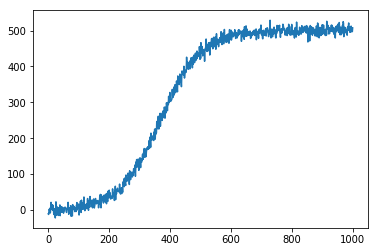

In [2]:
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 10
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Show the noisy data
plt.figure()
plt.plot(times, values)
plt.show()

In [3]:
# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, noise * 0.1],
    [0.02, 600, noise * 100]
    )

# Create a posterior log-likelihood
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Create a differential evolution MCMC routine
x0 = [
    real_parameters * 0.8,
    real_parameters * 0.9,
    real_parameters * 1.1,
]
mcmc = pints.MCMCSampling(log_posterior, 3, x0, method=pints.DreamMCMC)
mcmc.set_initial_phase_iterations(500)
mcmc.set_max_iterations(1000)
mcmc.set_log_to_screen(False)

Run!

In [4]:
# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

Running...


/home/michael/dev/pints/pints/_mcmc/_dream.py:290: RuntimeWarning: invalid value encountered in true_divide
  self._p /= self._L * np.sum(self._delta)


Done!


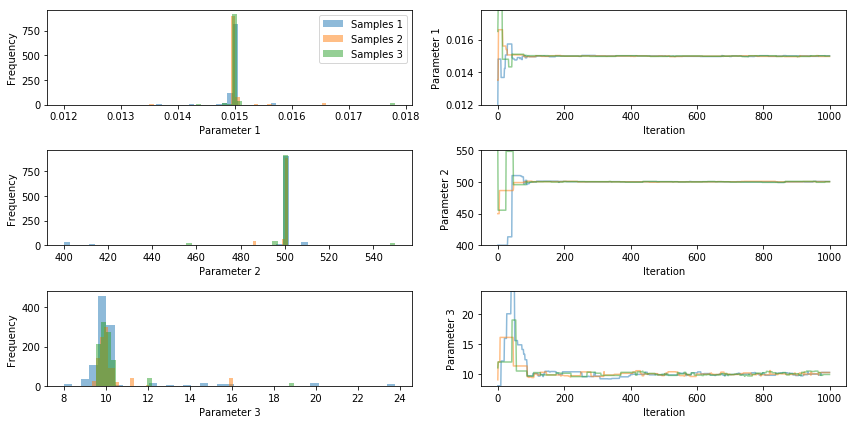

In [5]:
pints.plot.trace(chains)
plt.show()

/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


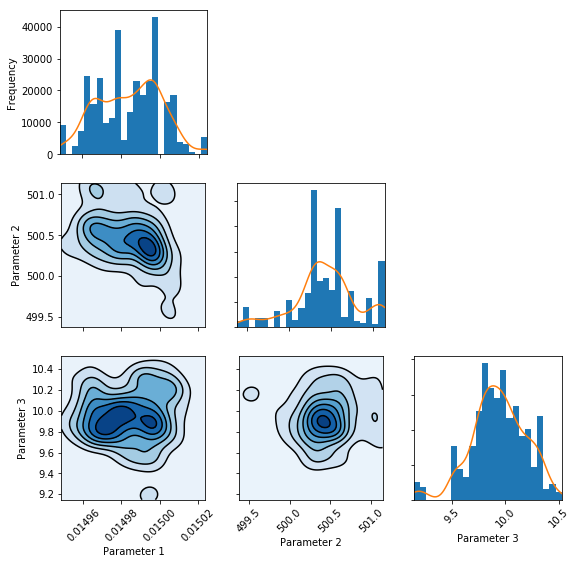

In [9]:
# Plot output
stacked = np.vstack(chains[:, 200::5])
pints.plot.pairwise(stacked, kde=True)
plt.show()

In [8]:
print(pints.rhat_all_params(chains[:, 200:]))

[1.0257716249632733, 1.0201434651085701, 1.0196027236319858]
